<Body>   
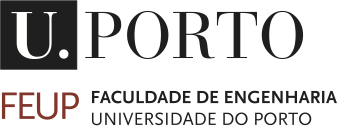   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Project #02**

**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

**Deadlines:** Present you work (and answer questions) on the week of **May 22** in your corresponding practical class. Upload the files until 23:59 of **June 2, 2023**.


---



# **Identification**

* **Group:** A05E
* **Name:** Filippo Comastri
* **Student Number:** 202211637

* **Name:** Manuel João Videira Silva
* **Student Number:** 201806123


---




**Initial setup:** To download the data files, run the next cell.

In [ ]:
!wget -O data-setMLproject2.zip https://www.dropbox.com/s/hnyhgqlj5lcqyqr/data-setMLproject2.zip?dl=0 --quiet
!unzip data-setMLproject2.zip -d. 


Archive:  data-setMLproject2.zip
  inflating: ./data_test.csv         
  inflating: ./__MACOSX/._data_test.csv  
  inflating: ./data_test2obs.csv     
  inflating: ./__MACOSX/._data_test2obs.csv  
  inflating: ./data_train.csv        
  inflating: ./__MACOSX/._data_train.csv  


# **Main goal**

Consider the following scenario: A mobile robot aims to build a map of the environment with **semantics**, meaning that the robot should be capable to classify the objects nearby. The robot is travelling around and carries on-board a 2D LIDAR measurement device that obtains range measurements at each sample time $t=0, 0.1, 0.2, \ldots$ The following cell shows an example of the type of data:


In [ ]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)
df_test2obs.head(5)
#df

# By convention, zero values mean no range measurements.
# The units are:
# [m] for px and py (position of the robot)
# [m] for the LIDAR ranges

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,-4.00,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.98,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. If there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. Moreover, with a small probability, the range measurements could be corrupted with *outliers*.

The next figure shows $r_t$ as a function of the angle $\beta$ taken at time $t=1.0\,s$.


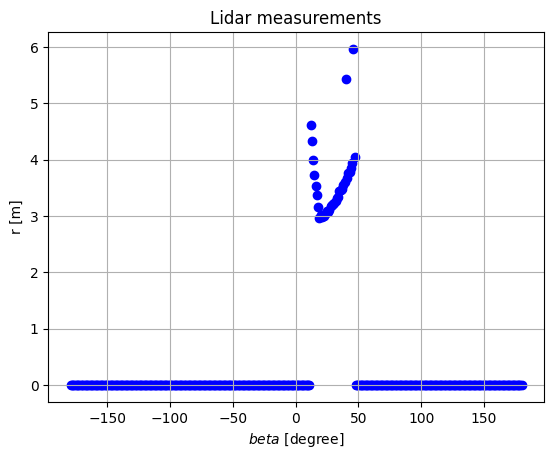

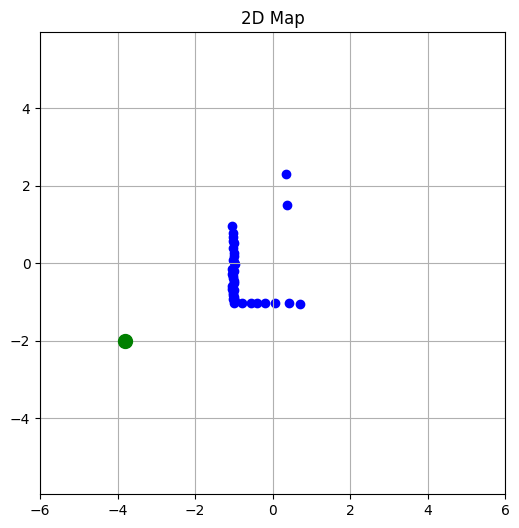

In [ ]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

t=1*10 #1sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

Note that it may be possible to have more than one object in the range of the LIDAR. \\
Here goes an example when $t=32\,s$:


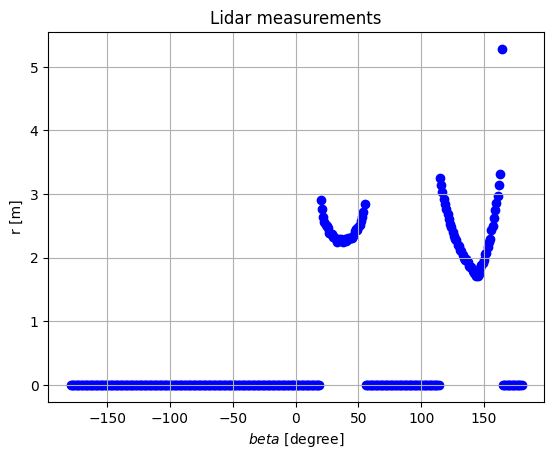

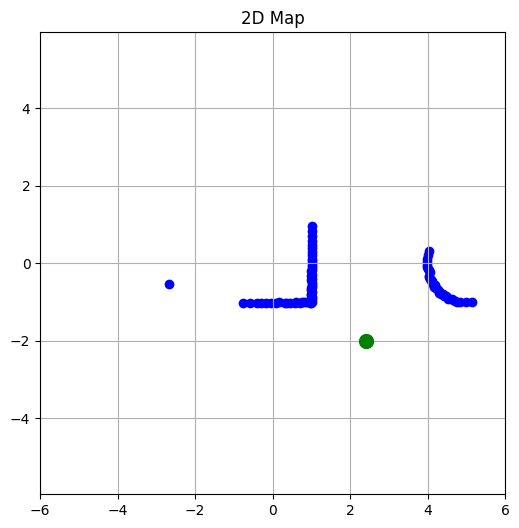

In [ ]:
t=32*10 #5sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

# **Part 1: Classification of one object**

At this point, the goal is to classify only one object that could be a square or a circle at each LIDAR snapshot. To this end, it was performed a set of 4 experiments for each obstacle (alone) where in each experiment the robot travelled during $40\,s$ with a constant speed and constant direction (horizontal line segment from left to right) from the initial position $(p_x, p_y) = (-4, \bar y)$ to the final position $(p_x, p_y) = (4, \bar y)$, where $\bar y = -4, -3, -2, -1\, m$ \\
The obstacle (circle and square) were placed at the center of the origin $(0,0)$. \\
All the experiments were combined in a unique dataset and then randomly split into two datasets: the trainning data set (70%) and the testing data set (30%). The content of each data set are displayed next.

In [ ]:
import pandas as pd
df_train = pd.read_csv('data_train.csv', index_col=0)
df_train

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.06,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.48,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.58,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.10,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.48,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.60,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2236,-2.12,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2237,-2.80,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2238,1.18,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
import pandas as pd
df_test = pd.read_csv('data_test.csv', index_col=0)
df_test

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.46,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
1,0.38,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,2.58,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,-2.84,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
4,-2.56,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,3.32,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.752938,2.789123,2.869662,2.960473,3.041882,3.292784,0.0,0.0,0.0,1.0
956,3.62,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
957,2.20,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.381054,1.557405,1.728042,2.111385,2.553902,0.000000,0.0,0.0,0.0,2.0
958,-2.98,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


Note that there is an extra column (the label column) that indicates if the obstacle is a **circle (label 1)** or a **square (label 2)**.

**1.1**
Implement a **$k$-nearest neighbor ($k$-NN)** classifier that receives the parameter $k$, the sample to classify (that are the range measurements at one snapshot), and a set of labeled training data. \\
Do not use sklearn or similar packages (use the results of notebook #7).

In [ ]:
#Training data
X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label

# Testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

## KNN

## L2 NORM DISTANCE between the 2 vector
def vector2norm(x, data):
  npoints = data.shape[0]
  distances = np.zeros(npoints)
  for i in range(npoints) :
    distances[i] = np.sqrt(np.sum((data[i] - x)**2))
  return distances


def kNN_classifier(k,x,data):
  npoints = data.shape[0]
  # compute distance to training points
  dist = vector2norm(x,data[:,:360])
 # sort along increasing distances
  ind = np.argsort(dist,axis=0)
  classes = data[:,360]
  classes_sorted = classes[ind]
  # determine class with more element in the k neighborhood
  c1 = 0
  c2 = 0
  for i in range(k):
    if classes_sorted[i]==1:
      c1 +=1
    else:
      c2 +=1
  if c1>c2:
    return 1
  else:
    return 2


**1.2**
Test the $k$-NN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy for $k=1,3,5,7,9$ \\
Note that accuracy is defined as 
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 


In [ ]:
from tqdm.notebook import trange, tqdm

# Let's check for all trainning data
ks = [1,3,5,7,9]

classification_train = []
for i in tqdm(range(len(ks))):
  correct_pred = 0
  classification = []
  for t in tqdm(range(len(X_train))):
    res = kNN_classifier(ks[i],X_train[t],data_train)
    classification.append(res)
    if res == Y_train[t]:
      correct_pred += 1
  classification_train.append(classification)
  acc = correct_pred / len(X_train)
  print(f"Accuracy of the model with TRAINING DATA and K = {ks[i]} : {100.0*acc:4.2f}%")


# Let's check for the testing data

classification_test = []
for i in tqdm(range(len(ks))):
  correct_pred = 0
  classification = []
  for t in tqdm(range(len(X_test))):
    # Should we use data_train or data_test ?
    res = kNN_classifier(ks[i],X_test[t],data_train)
    classification.append(res)
    if res == Y_test[t]:
      correct_pred += 1
  acc = correct_pred / len(X_test)
  print(f"Accuracy of the model with TEST DATA and K = {ks[i]} : {100.0*acc:4.2f}%")
  classification_test.append(classification)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2240 [00:00<?, ?it/s]

Accuracy of the model with TRAINING DATA and K = 1 : 100.00%


  0%|          | 0/2240 [00:00<?, ?it/s]

Accuracy of the model with TRAINING DATA and K = 3 : 99.87%


  0%|          | 0/2240 [00:00<?, ?it/s]

Accuracy of the model with TRAINING DATA and K = 5 : 99.64%


  0%|          | 0/2240 [00:00<?, ?it/s]

Accuracy of the model with TRAINING DATA and K = 7 : 99.82%


  0%|          | 0/2240 [00:00<?, ?it/s]

Accuracy of the model with TRAINING DATA and K = 9 : 99.78%


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

Accuracy of the model with TEST DATA and K = 1 : 100.00%


  0%|          | 0/960 [00:00<?, ?it/s]

Accuracy of the model with TEST DATA and K = 3 : 99.48%


  0%|          | 0/960 [00:00<?, ?it/s]

Accuracy of the model with TEST DATA and K = 5 : 99.27%


  0%|          | 0/960 [00:00<?, ?it/s]

Accuracy of the model with TEST DATA and K = 7 : 99.69%


  0%|          | 0/960 [00:00<?, ?it/s]

Accuracy of the model with TEST DATA and K = 9 : 99.58%


**1.3**
Implement an Artificial Neural Network (ANN) of the type multi-layer perceptron (MLP) with
1. an input layer that receives the first 10 nonzero range measurements (for each snapshot);  
2. one hidden layer with 5 neurons with activation functions of the type ReLU (rectified linear unit);
3. an output layer with 1 neuron with a sigmoid activation function; 

4. a loss function of the type mean square error.

Train the ANN using the `data_train.csv` set. \\
**Do not use** PyTorch, TensorFlow or similar packages (check notebook #8). \\
**Tip:** It is important to shuffle the training data. You may get better results with non constant learning rate. A final loss below 0.05 is good!


In [ ]:
import numpy as np
np.random.seed(42)

N_INPUTS = 10  #Number of inputs

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

# ReLu activation function: 
def relu(x):
    return max(0, x)

# Derivative of ReLu
def deriv_relu(x):
    return 0 if x <= 0 else 1

class NeuralNetwork:
  '''
  Structure of the neural network:
    - N_INPUTS inputs
    - a hidden layer with 5 neurons (h1, h2, h3, h4, h5)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Biases
    self.b1 = np.random.random()
    self.b2 = np.random.random()
    self.b3 = np.random.random()
    self.b4 = np.random.random()
    self.b5 = np.random.random()
    self.bo = np.random.random()

    # Weights
    self.w1o, self.w2o, self.w3o, self.w4o, self.w5o = np.random.random(5)
    self.wi1 = np.random.random(N_INPUTS)
    self.wi2 = np.random.random(N_INPUTS)
    self.wi3 = np.random.random(N_INPUTS)
    self.wi4 = np.random.random(N_INPUTS)
    self.wi5 = np.random.random(N_INPUTS)

  def feedforward(self, x):
    '''
    - x is a numpy array with N_INPUTS elements.
    '''
    # Hidden layer
    self.sum_h1 = np.dot(self.wi1, x) + self.b1
    self.sum_h2 = np.dot(self.wi2, x) + self.b2
    self.sum_h3 = np.dot(self.wi3, x) + self.b3
    self.sum_h4 = np.dot(self.wi4, x) + self.b4
    self.sum_h5 = np.dot(self.wi5, x) + self.b5
    self.h1 = relu(self.sum_h1)
    self.h2 = relu(self.sum_h2)
    self.h3 = relu(self.sum_h3)
    self.h4 = relu(self.sum_h4)
    self.h5 = relu(self.sum_h5)
    
    # Output layer 
    self.sum_o1 = self.w1o*self.h1 + self.w2o*self.h2 + self.w3o*self.h3 + self.w4o*self.h4 + self.w5o*self.h5 + self.bo
    self.o1 = sigmoid(self.sum_o1)

    return self.o1
  
  def summary(self):
    nparams = 11 + len(self.wi1) + len(self.wi2) + len(self.wi3) + len(self.wi4) + len(self.wi5)
    print('--- Number of params = ',nparams)
  
  def train(self, data, y_trues, learn_rate = 0.1, epochs = 500):
    '''
    - data is a (n x N_INPUTS) numpy array, n = # of samples in the dataset.
    - y_trues is a numpy array with n elements.
      Elements in y_true correspond to those in data.
    '''
    loss_prev = 10000  #loss_prev is the loss of the previous iteration
    for epoch in range(epochs):
      for x, y_true in zip(data, y_trues):

        # *************************************************
        # 1. Feedforward Step
        y_pred = self.feedforward(x)
        # *************************************************
        # 2. Backpropagation Step

        # Partial derivatives.
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Output Layer:  Neuron o1
        d_ypred_d_w1o = self.h1 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w2o = self.h2 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w3o = self.h3 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w4o = self.h4 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w5o = self.h5 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_bo = deriv_sigmoid(self.sum_o1)

        d_ypred_d_h1 = self.w1o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h2 = self.w2o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h3 = self.w3o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h4 = self.w4o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h5 = self.w5o * deriv_sigmoid(self.sum_o1)

        # Hidden Layer: Neuron h1
        d_h1_d_wi1 = x * deriv_relu(self.sum_h1)
        d_h1_d_b1 = deriv_relu(self.sum_h1)

        # Hidden Layer: Neuron h2
        d_h2_d_wi2 = x * deriv_relu(self.sum_h2)
        d_h2_d_b2 = deriv_relu(self.sum_h2)

        # Hidden Layer: Neuron h3
        d_h3_d_wi3 = x * deriv_relu(self.sum_h3)
        d_h3_d_b3 = deriv_relu(self.sum_h3)

        # Hidden Layer: Neuron h4
        d_h4_d_wi4 = x * deriv_relu(self.sum_h4)
        d_h4_d_b4 = deriv_relu(self.sum_h4)

        # Hidden Layer: Neuron h5
        d_h5_d_wi5 = x * deriv_relu(self.sum_h5)
        d_h5_d_b5 = deriv_relu(self.sum_h5)

        # *************************************************
        # 3. Gradient Descent
        # Output Layer:  Neuron o1
        self.w1o -= learn_rate * d_L_d_ypred * d_ypred_d_w1o
        self.w2o -= learn_rate * d_L_d_ypred * d_ypred_d_w2o
        self.w3o -= learn_rate * d_L_d_ypred * d_ypred_d_w3o
        self.w4o -= learn_rate * d_L_d_ypred * d_ypred_d_w4o
        self.w5o -= learn_rate * d_L_d_ypred * d_ypred_d_w5o
        self.bo -= learn_rate * d_L_d_ypred * d_ypred_d_bo

        # Hidden Layer: Neuron h1
        self.wi1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_wi1
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Hidden Layer: Neuron h2
        self.wi2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_wi2
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
        
        # Hidden Layer: Neuron h3
        self.wi3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_wi3
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_b3

        # Hidden Layer: Neuron h4
        self.wi4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_wi4
        self.b4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_b4

        # Hidden Layer: Neuron h5
        self.wi5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_wi5
        self.b5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_b5

      # *************************************************
      # 4. Performance assessment (per epoch)
      if epoch % 5 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(y_trues, y_preds)
        print("Epoch %d  --> Loss: %.4f" % (epoch, loss))
        # Uncomment this part to enable a nonconstant learning rate 
        if loss > loss_prev:  #if loss did not decrease, let's decrease the learn_rate
          if learn_rate > 0.002:
            learn_rate = learn_rate*.9  #decrease 90% of the previous value
          print("I'm at epoch", epoch, "with new learn_rate: ", learn_rate)
        loss_prev = loss

# Create the ANN
model = NeuralNetwork()

#Training data
X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label

# Testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Build the Trainingset (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
  j=0
  for i in range(360):
    if X_train[t][i] > 0:
      if j < N_INPUTS:
        trainingset_X[t][j] = X_train[t][i]
        j +=1

# Trainingset: here the labels are 0 or 1
trainingset_Y = Y_train-1

#Shuffling the set...
from sklearn.utils import shuffle
trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

model.summary()

# Train the ANN 
model.train(trainingset_X, trainingset_Y, learn_rate = 0.1, epochs = 1000)

--- Number of params =  61
Epoch 0  --> Loss: 0.4999
Epoch 5  --> Loss: 0.2116
Epoch 10  --> Loss: 0.1859
Epoch 15  --> Loss: 0.1925
I'm at epoch 15 with new learn_rate:  0.09000000000000001
Epoch 20  --> Loss: 0.1873
Epoch 25  --> Loss: 0.1733
Epoch 30  --> Loss: 0.1711
Epoch 35  --> Loss: 0.1866
I'm at epoch 35 with new learn_rate:  0.08100000000000002
Epoch 40  --> Loss: 0.1702
Epoch 45  --> Loss: 0.1711
I'm at epoch 45 with new learn_rate:  0.07290000000000002
Epoch 50  --> Loss: 0.1647
Epoch 55  --> Loss: 0.1650
I'm at epoch 55 with new learn_rate:  0.06561000000000002
Epoch 60  --> Loss: 0.1618
Epoch 65  --> Loss: 0.1599
Epoch 70  --> Loss: 0.1593
Epoch 75  --> Loss: 0.1579
Epoch 80  --> Loss: 0.1567
Epoch 85  --> Loss: 0.1558
Epoch 90  --> Loss: 0.1547
Epoch 95  --> Loss: 0.1536
Epoch 100  --> Loss: 0.1522
Epoch 105  --> Loss: 0.1510
Epoch 110  --> Loss: 0.1493
Epoch 115  --> Loss: 0.1477
Epoch 120  --> Loss: 0.1469
Epoch 125  --> Loss: 0.1450
Epoch 130  --> Loss: 0.1399
Epoch 1

**1.4**
Test the ANN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy. Write in a brief sentence of the main conclusions about the classifiers (k-NN and ANN) until this point.

**BRIEF SENTENCE ABOUT THE MAIN CONCLUSION ABOUT THE CLASSIFIERS (K-NN AND ANN)**

In [ ]:
# Evaluation with the Training set
classification = []
for t in range(len(Y_train)):
  classification.append( model.feedforward(trainingset_X[t]) )
classification = np.array(classification)
error_clas = 0
for t in range(len(classification)):
  if (classification[t] >= 0.5) and trainingset_Y[t] == 0:
    error_clas +=1 
  if (classification[t] < 0.5) and trainingset_Y[t] == 1:
    error_clas +=1 
print("Number of misclassified samples in the training data: ", error_clas, "in", len(trainingset_Y))
acc = (len(trainingset_Y)-error_clas)/len(trainingset_Y)
print(f"Accuracy of the model on the training data : {100.0*acc:4.2f}%")


# Evaluation with Test_set
testingset_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
  j=0
  for i in range(360):
    if X_test[t][i] > 0:
      if j < N_INPUTS:
        testingset_X[t][j] = X_test[t][i]
        j +=1

testingset_Y = Y_test-1

classification = []
for t in range(len(Y_test)):
  classification.append( model.feedforward(testingset_X[t]) )
classification = np.array(classification)
error_clas = 0
for t in range(len(classification)):
  if (classification[t] >= 0.5) and testingset_Y[t] == 0:
    error_clas +=1 
  if (classification[t] < 0.5) and testingset_Y[t] == 1:
    error_clas +=1 
print("Number of misclassified samples in the test data: ", error_clas, "in", len(testingset_Y))
acc = (len(testingset_Y)-error_clas)/len(testingset_Y)
print(f"Accuracy of the model on the test data : {100.0*acc:4.2f}%")



Number of misclassified samples in the training data:  89 in 2240
Accuracy of the model on the training data : 96.03%
Number of misclassified samples in the test data:  43 in 960
Accuracy of the model on the test data : 95.52%


# **Part 2: Classification of two objects**

We would like now to use the previous ANN classifier to the data in `data_test2obs.csv` that may have two objects at the same snapshot. The idea is to before send the range measurements to the classifier, apply first a k-means at each snapshot to separate the data into two sub-sets such that each sub-set only contains data of one object. Then, send each subset of data to the ANN classifier.

**2.1**
Implement the k-means algorithm and test it for two snapshots **converted to the 2D map** (that is, the input data for the k-means is the 2D map) of the dataset `data_test2obs.csv` for 
1. $t=1\,s$ (which has only one object) and 
2. for $t=32\,s$ (which has 2 objects). 

What can you conclude? \\
Do not use sklearn or similar packages (use the results of notebook #10).


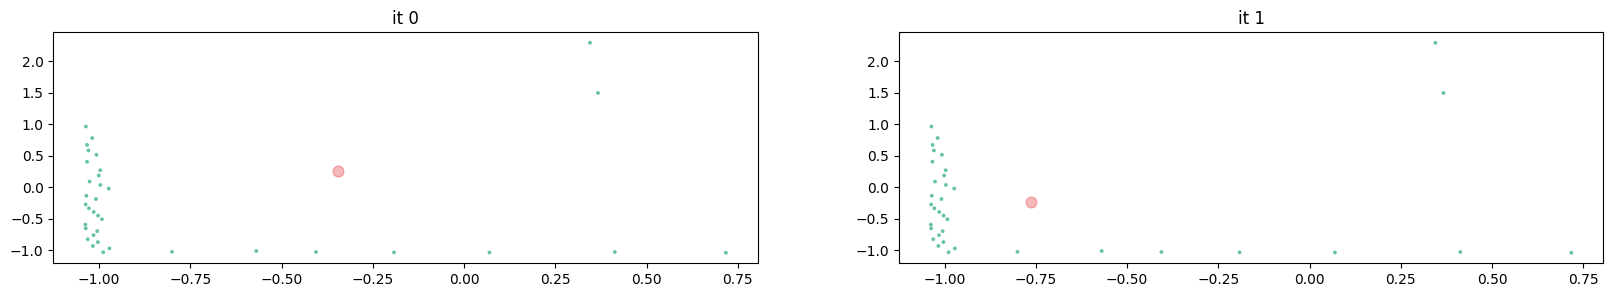

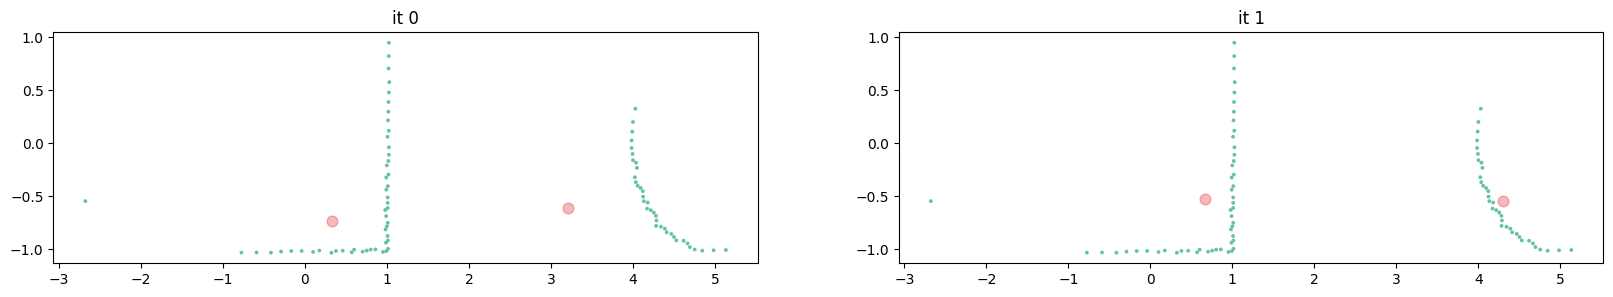

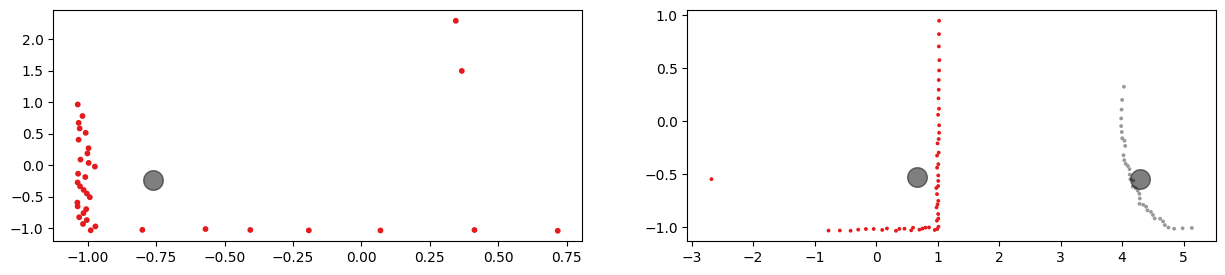

In [ ]:
# To complete

def kmeans_func(X_func, K_func, show_plot=0, ini_method=0):
  '''
    X_func are sample points; 
    K_func is the number of clusters;
    showplot 0/1 - not / show centroid evolution over iterations;
    ini_method 0/1 - ini centroids 0=> with random within data bounderies or 1=>from the initial points (risky!)
  '''
  cluster = np.zeros(X_func.shape[0],dtype=int)

  centr_ini = []

  if ini_method:  # 1 is points, 0 is random
    # Initial centroids are sample points (risky!)
    for i in range(K_func):
      centr_ini.append(X_func[i])
  else:
    # Non absurd Random Initial Centroids
    max0 = max(X_func[:,0]);
    min0 = min(X_func[:,0]);
    max1 = max(X_func[:,1]);
    min1 = min(X_func[:,1]);

    for i in range(K_func):
      centr_ini.append([random.uniform(min0,max0),random.uniform(min1,max1)])

  iter = 0
  diff = 1
  centroids = centr_ini
  centr_list = [centroids]

  while diff:
    # for each sample
    for sample_i, sample_pt in enumerate(X_func):
      min_dist = float('inf')
      # dist of the point from all centroids
      for centroid_i, centroid in enumerate(centroids):
        dist = np.sqrt((centroid[0] - sample_pt[0])**2+(centroid[1]-sample_pt[1])**2)
        # store closest centroid
        if dist < min_dist :
         cluster[sample_i] = centroid_i
         min_dist = dist
    
    sum = np.zeros((K_func,2))
    cnt = np.zeros(K_func)
    for sample_i, sample_pt in enumerate(X_func):
      sum[cluster[sample_i]] += X_func[sample_i]
      cnt[cluster[sample_i]] += 1
    new_centroids = np.zeros((K_func,2))
    for k in range(K_func):
      if (cnt[k]>0):
        new_centroids[k] = sum[k] / cnt[k]
      else:
        # hopefully, the next iteration will fix uninteresting centroid
        new_centroids[k] = [random.uniform(min0,max0),random.uniform(min1,max1)] 



    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
      centr_list.append(new_centroids)
    iter = iter+1
  
  #print("Number of iterations", iter)
  #print(centr_list)

  if show_plot: # pretty subplotting
    cols = min(iter,6) # max 6 plots
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20,3))
    for col in range(min(cols,iter)):
      ax[col].scatter(X_func[:, 0], X_func[:, 1], s=3, c=np.zeros(X_func.shape[0]), cmap='Set2')
      i = round(iter/cols*col)
      if (col==cols-1):
        i = iter-1
      ## print("centr %s", i,"=>", centr_list[i])
      ## devia funcionar ### ax[row, col].scatter(centr_list[i][:,0], centr_list[i][:,1], c='black', s=200, alpha=0.5);
      for j in range(K_func):
        centr_plot_x = centr_list[i][j][0]
        centr_plot_y = centr_list[i][j][1]
        ax[col].scatter(centr_plot_x, centr_plot_y, c=j, s=60, alpha=0.3, cmap='Set1')
        ax[col].title.set_text("it " + str(i) )
    plt.show()

  return centroids, cluster


# #Build the cloud points in 2D map
x_o1, y_o1 = [], []
x_o32,y_o32 = [], []

# t1 = 1 sec
t1= 10 * 1
for i in range(len(Lidar_range[t1])):
  if Lidar_range[t1][i] > 0:
    x_o1.append(px[t1]+Lidar_range[t1][i]*np.cos(angle[i]/180*np.pi))
    y_o1.append(py[t1]+Lidar_range[t1][i]*np.sin(angle[i]/180*np.pi))

X1 = np.array([x_o1, y_o1]).T
centr1, clust1 = kmeans_func(X1, 1, show_plot=1, ini_method=0)

# t32 = 32 sec
t32=10*32 
for i in range(len(Lidar_range[t32])):
  if Lidar_range[t32][i] > 0:
    x_o32.append(px[t32]+Lidar_range[t32][i]*np.cos(angle[i]/180*np.pi))
    y_o32.append(py[t32]+Lidar_range[t32][i]*np.sin(angle[i]/180*np.pi))

X32 = np.array([x_o32, y_o32]).T
centr32, clust32 = kmeans_func(X32, 2, show_plot=1, ini_method=0)


# print(clust)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
axs[0].scatter(X1[:, 0], X1[:, 1], c=clust1, s=10, cmap='Set1')
#plt.scatter(X[:, 0], X[:, 1], c=y_true, s=20, cmap='Set1', alpha=0.1)
axs[0].scatter(centr1[:, 0], centr1[:, 1], c='black', s=200, alpha=0.5)

axs[1].scatter(X32[:, 0], X32[:, 1], c=clust32, s=3, cmap='Set1')
#plt.scatter(X[:, 0], X[:, 1], c=y_true, s=20, cmap='Set1', alpha=0.1)
axs[1].scatter(centr32[:, 0], centr32[:, 1], c='black', s=200, alpha=0.5)

**2.2**
Using the previous results, 
1. implement a method to automatically identify for each snapshot if it has 1 or 2 objects;
2. build a new test set with all the data in `data_test2obs.csv`, but now the new test set only has 1 object in each snapshot (and therefore this data set has more lines);
3. test this new data set using the ANN classifier.

Plot the position of the robot and the classified objects for some snapshots. What are the main conclusions?

In [ ]:
from tqdm.notebook import trange, tqdm

# To complete
N_INPUTS = 10

Threshold = 5 # to decide if k=1 or k=2,

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

def SSE(X, centroids, cluster): 
  '''
    returns the Sum of Squared Error
    X are the 2D points
    centroids are the cluster centers
    cluster is the cluster that each data point belongs to
  '''
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[cluster[i], 0]-val[0])**2 +(centroids[cluster[i], 1]-val[1])**2)  ####
  return sum

# Building the data set for ANN testing using k-means to split objects 

test_set_X = np.array([])
# ...
# itero su tutti gli istanti
for t in tqdm(range(len(Lidar_range))):
    x_o,y_o = [],[]
    # creare mappa 2d per ogni istante
    for i in range(len(Lidar_range[t])):
      if Lidar_range[t][i] > 0:
        x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
        y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))
    
    X = np.array([x_o, y_o]).T
    cost_list = []
    k_range = range(1, 4) # era (1,3)
    for k in k_range:
      centr, clust = kmeans_func(X, k, show_plot=0, ini_method=0) 
      # Calculate SSE
      cost = SSE(X, centr, clust)
      cost_list.append(cost)
    #Let's now decide if this snapshot has 1 or 2 obstacles
    der_list = []
    der_range = range(1, max(k_range))
    for i in der_range:
      der_list.append( cost_list[i]-cost_list[i-1] )
    for i in reversed(der_range):
      #print(der_list[i-1])
      if der_list[i-1] < - Threshold:
        bestK = i
        break
    #print('bestK',bestK)
    if bestK == 2 :
      #print('2 oggetti')
      #2 objects
      X_feature1, X_feature2 = np.zeros([N_INPUTS]), np.zeros([N_INPUTS])
      j1,j2=0,0
      for i in range(len(x_o)):
        if j1 < N_INPUTS:
          if clust[i] == 0:
            X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
            j1=j1+1
        if j2 < N_INPUTS:
          if clust[i] == 1:
            X_feature2[j2]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
            j2=j2+1
      if len(test_set_X) == 0:
        test_set_X = np.array([X_feature1, X_feature2])
      else:
        test_set_X = np.concatenate((test_set_X,np.array([X_feature1, X_feature2])))
    else: #only one object
      X_feature1 = np.zeros([N_INPUTS])
      j1=0
      for i in range(len(x_o)):
        if j1 < N_INPUTS:
          if clust[i] == 0:
            X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
            j1=j1+1
      if len(test_set_X) == 0:
        test_set_X = np.array([X_feature1])
      else:
        test_set_X = np.concatenate((test_set_X,np.array([X_feature1])))
  
print(test_set_X.shape)

  0%|          | 0/600 [00:00<?, ?it/s]

(1024, 10)


In [ ]:
# classify the new datapoints using the ANN classifier
circles = 0
squares = 0
classification_2objs = []
for t in range(len(test_set_X)):
  pred = model.feedforward(test_set_X[t])
  if pred < 0.5 :
    circles += 1
  else :
    squares += 1
  classification_2objs.append( pred )
classification_2objs = np.array(classification_2objs)
print('Circles',circles)
print('Squares', squares)


Circles 257
Squares 767


**2.3 (Extra)** 
Using now PyTorch or TensorFlow (or other similar package), implement a better ANN (meaning with a better accuracy) and test it.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete
import tensorflow as tf
from keras import backend as K
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import numpy as np 

modelKeras = Sequential()
modelKeras.add(Dense(5, input_dim=10,activation="relu"))
modelKeras.add(Dense(3,activation="relu"))
modelKeras.add(Dense(1,activation="sigmoid"))


initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000000,
    #staircase=True,
    decay_rate=0.96)

modelKeras.compile(loss="mse", optimizer=SGD(learning_rate=lr_schedule))

modelKeras.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 3)                 18        
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [ ]:
N_INPUTS = 10

#Training data
X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label

# Testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Build the Trainingset (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
  j=0
  for i in range(360):
    if X_train[t][i] > 0:
      if j < N_INPUTS:
        trainingset_X[t][j] = X_train[t][i]
        j +=1

# Trainingset: here the labels are 0 or 1
trainingset_Y = Y_train-1

#Shuffling the set...
from sklearn.utils import shuffle
trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

hist=modelKeras.fit(trainingset_X, trainingset_Y,epochs=300,batch_size=4)

Epoch 1/300
560/560 [==============================] - 2s 3ms/step - loss: 0.2400
Epoch 2/300
560/560 [==============================] - 1s 2ms/step - loss: 0.2229
Epoch 3/300
560/560 [==============================] - 1s 2ms/step - loss: 0.2195
Epoch 4/300
560/560 [==============================] - 1s 2ms/step - loss: 0.2088
Epoch 5/300
560/560 [==============================] - 1s 2ms/step - loss: 0.2086
Epoch 6/300
560/560 [==============================] - 1s 2ms/step - loss: 0.2030
Epoch 7/300
560/560 [==============================] - 1s 2ms/step - loss: 0.1943
Epoch 8/300
560/560 [==============================] - 1s 1ms/step - loss: 0.1891
Epoch 9/300
560/560 [==============================] - 1s 1ms/step - loss: 0.1847
Epoch 10/300
560/560 [==============================] - 1s 2ms/step - loss: 0.1858
Epoch 11/300
560/560 [==============================] - 1s 2ms/step - loss: 0.1925
Epoch 12/300
560/560 [==============================] - 1s 2ms/step - loss: 0.1796
Epoch 13/300


In [ ]:
# Evaluation with Test_set
testingset_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
  j=0
  for i in range(360):
    if X_test[t][i] > 0:
      if j < N_INPUTS:
        testingset_X[t][j] = X_test[t][i]
        j +=1

testingset_Y = Y_test-1

classification = []
for t in range(len(Y_test)):
  classification.append( modelKeras.predict(np.array(testingset_X[t]).reshape(1, testingset_X[t].shape[0])) )
classification = np.array(classification)
error_clas = 0
for t in range(len(classification)):
  if (classification[t] >= 0.5) and testingset_Y[t] == 0:
    error_clas +=1 
  if (classification[t] < 0.5) and testingset_Y[t] == 1:
    error_clas +=1 
print("Number of misclassified samples in the test data: ", error_clas, "in", len(testingset_Y))
acc = (len(testingset_Y)-error_clas)/len(testingset_Y)
print(f"Accuracy of the model on the test data : {100.0*acc:4.2f}%")

1/1 [==============================] - 0s 23ms/step
Number of misclassified samples in the test data:  150 in 960
Accuracy of the model on the test data : 84.38%
